<a href="https://colab.research.google.com/github/erlonL/testes-inferencia/blob/main/Teste_ShapiroWilk_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste de Shapiro Wilk

## Implementação

In [62]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
from scipy.stats import shapiro

In [63]:
def generate_normal_random_values(count, min_val, max_val):
    mn = (max_val - min_val) / 2

    X = np.random.normal(loc=mn, scale=mn/3, size=count)
    X = np.clip(X, min_val, max_val)

    return X

In [64]:
def g_par():
    return random.randint(2, 15) * 2

In [65]:
def generate_sample(n, low, high, num_vars=10):
    return np.sum(np.random.uniform(low, high, (n, num_vars)), axis=1) / num_vars

In [66]:
def generate_fake_normal_sample(n, min_val, max_val):
    u1 = []
    u2 = []
    x = []

    for i in range(n):
        u1.append(random.uniform(0, 1))
        u2.append(random.uniform(0, 1))

    for i in range(n):
        x.append(min_val + (max_val - min_val) * (math.sqrt(-2 * math.log(u1[i])) * math.cos(2 * math.pi * u2[i])))

    return x

In [67]:
def treat_values(values):
    values = [round(x, ndigits=0) for x in values]
    values = np.array(values)
    return values

In [68]:
def statistics(values):
    # Informações importantes sobre o conjunto de valores

    media = np.mean(values)
    var = np.var(values)
    dp = np.std(values)
    cont = len(values)

    return media, var, dp, cont

In [69]:
def shapiro_wilk_critico(n):
    # alfa = 0.05 (95% de confiança)

    if n <= 30:
        # valores entre 3 e 30
        shapiro_critico = [0.767, 0.748, 0.762, 0.788, 0.803, 0.818, 0.829, 0.842, 0.850, 0.859,
                      0.866, 0.874, 0.881, 0.887, 0.892, 0.897, 0.901, 0.905, 0.908, 0.911,
                      0.914, 0.916, 0.918, 0.920, 0.923, 0.924, 0.926, 0.927]
        sw_critico = shapiro_critico[n - 3]
    else:
        pass

    return sw_critico

In [70]:
colunas = ['i',
           'n-i+1',
           'ain',
           'Xn-i+1',
           'Xi',
           'ain * Xn-i+1 - Xi']

In [86]:
rdf = pd.DataFrame()

In [87]:
a = {
    1: [0.7071, 0.7071, 0.6872, 0.6646, 0.6431, 0.6233, 0.6052, 0.5888, 0.5739, 0.5601, 0.5475, 0.5359, 0.5251, 0.5150, 0.5056, 0.4968, 0.4886, 0.4808, 0.4734, 0.4643, 0.4590, 0.4542, 0.4493, 0.4450, 0.4407, 0.4366, 0.4328, 0.4291, 0.4254],
    2: [0, 0, 0.1677, 0.2413, 0.2806, 0.3031, 0.3164, 0.3244, 0.3291, 0.3315, 0.3325, 0.3325, 0.3318, 0.3306, 0.3290, 0.3273, 0.3253, 0.3232, 0.3211, 0.3185, 0.3156, 0.3126, 0.3098, 0.3069, 0.3043, 0.3018, 0.2992, 0.2968, 0.2944],
    3: [0, 0, 0, 0, 0.0875, 0.1401, 0.1743, 0.1976, 0.2141, 0.2260, 0.2347, 0.2412, 0.2460, 0.2495, 0.2521, 0.2540, 0.2553, 0.2561, 0.2565, 0.2578, 0.2571, 0.2563, 0.2554, 0.2543, 0.2533, 0.2522, 0.2510, 0.2499, 0.2487],
    4: [0, 0, 0, 0, 0, 0, 0.0561, 0.0947, 0.1224, 0.1429, 0.1586, 0.1707, 0.1802, 0.1878, 0.1939, 0.1988, 0.2027, 0.2059, 0.2085, 0.2119, 0.2131, 0.2139, 0.2145, 0.2148, 0.2151, 0.2152, 0.2151, 0.2150, 0.2148],
    5: [0, 0, 0, 0, 0, 0, 0, 0, 0.0399, 0.0695, 0.0922, 0.1099, 0.1240, 0.1353, 0.1447, 0.1524, 0.1587, 0.1641, 0.1686, 0.1736, 0.1764, 0.1787, 0.1807, 0.1822, 0.1836, 0.1848, 0.1857, 0.1864, 0.1870],
    6: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0303, 0.0539, 0.0727, 0.0880, 0.1005, 0.1109, 0.1197, 0.1271, 0.1334, 0.1399, 0.1443, 0.1480, 0.1512, 0.1539, 0.1563, 0.1584, 0.1601, 0.1616, 0.1630],
    7: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0240, 0.0433, 0.0593, 0.0725, 0.0837, 0.0932, 0.1013, 0.1092, 0.1150, 0.1201, 0.1245, 0.1283, 0.1316, 0.1346, 0.1372, 0.1395, 0.1415],
    8: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0196, 0.0359, 0.0496, 0.0612, 0.0711, 0.0804, 0.0878, 0.0941, 0.0997, 0.1046, 0.1089, 0.1128, 0.1162, 0.1192, 0.1219],
    9: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0163, 0.0303, 0.0422, 0.0530, 0.0618, 0.0696, 0.0764, 0.0823, 0.0876, 0.0923, 0.0965, 0.1002, 0.1036],
    10: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0140, 0.0263, 0.0368, 0.0459, 0.0539, 0.0610, 0.0672, 0.0728, 0.0778, 0.0822, 0.0862],
    11: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0122, 0.0228, 0.0321, 0.0403, 0.0476, 0.0540, 0.0598, 0.0650, 0.0697],
    12: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0107, 0.0200, 0.0284, 0.0358, 0.0424, 0.0483, 0.0537],
    13: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0094, 0.0178, 0.0253, 0.0320, 0.0381],
    14: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0084, 0.0159, 0.0227],
    15: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0000,	0.0076]
}

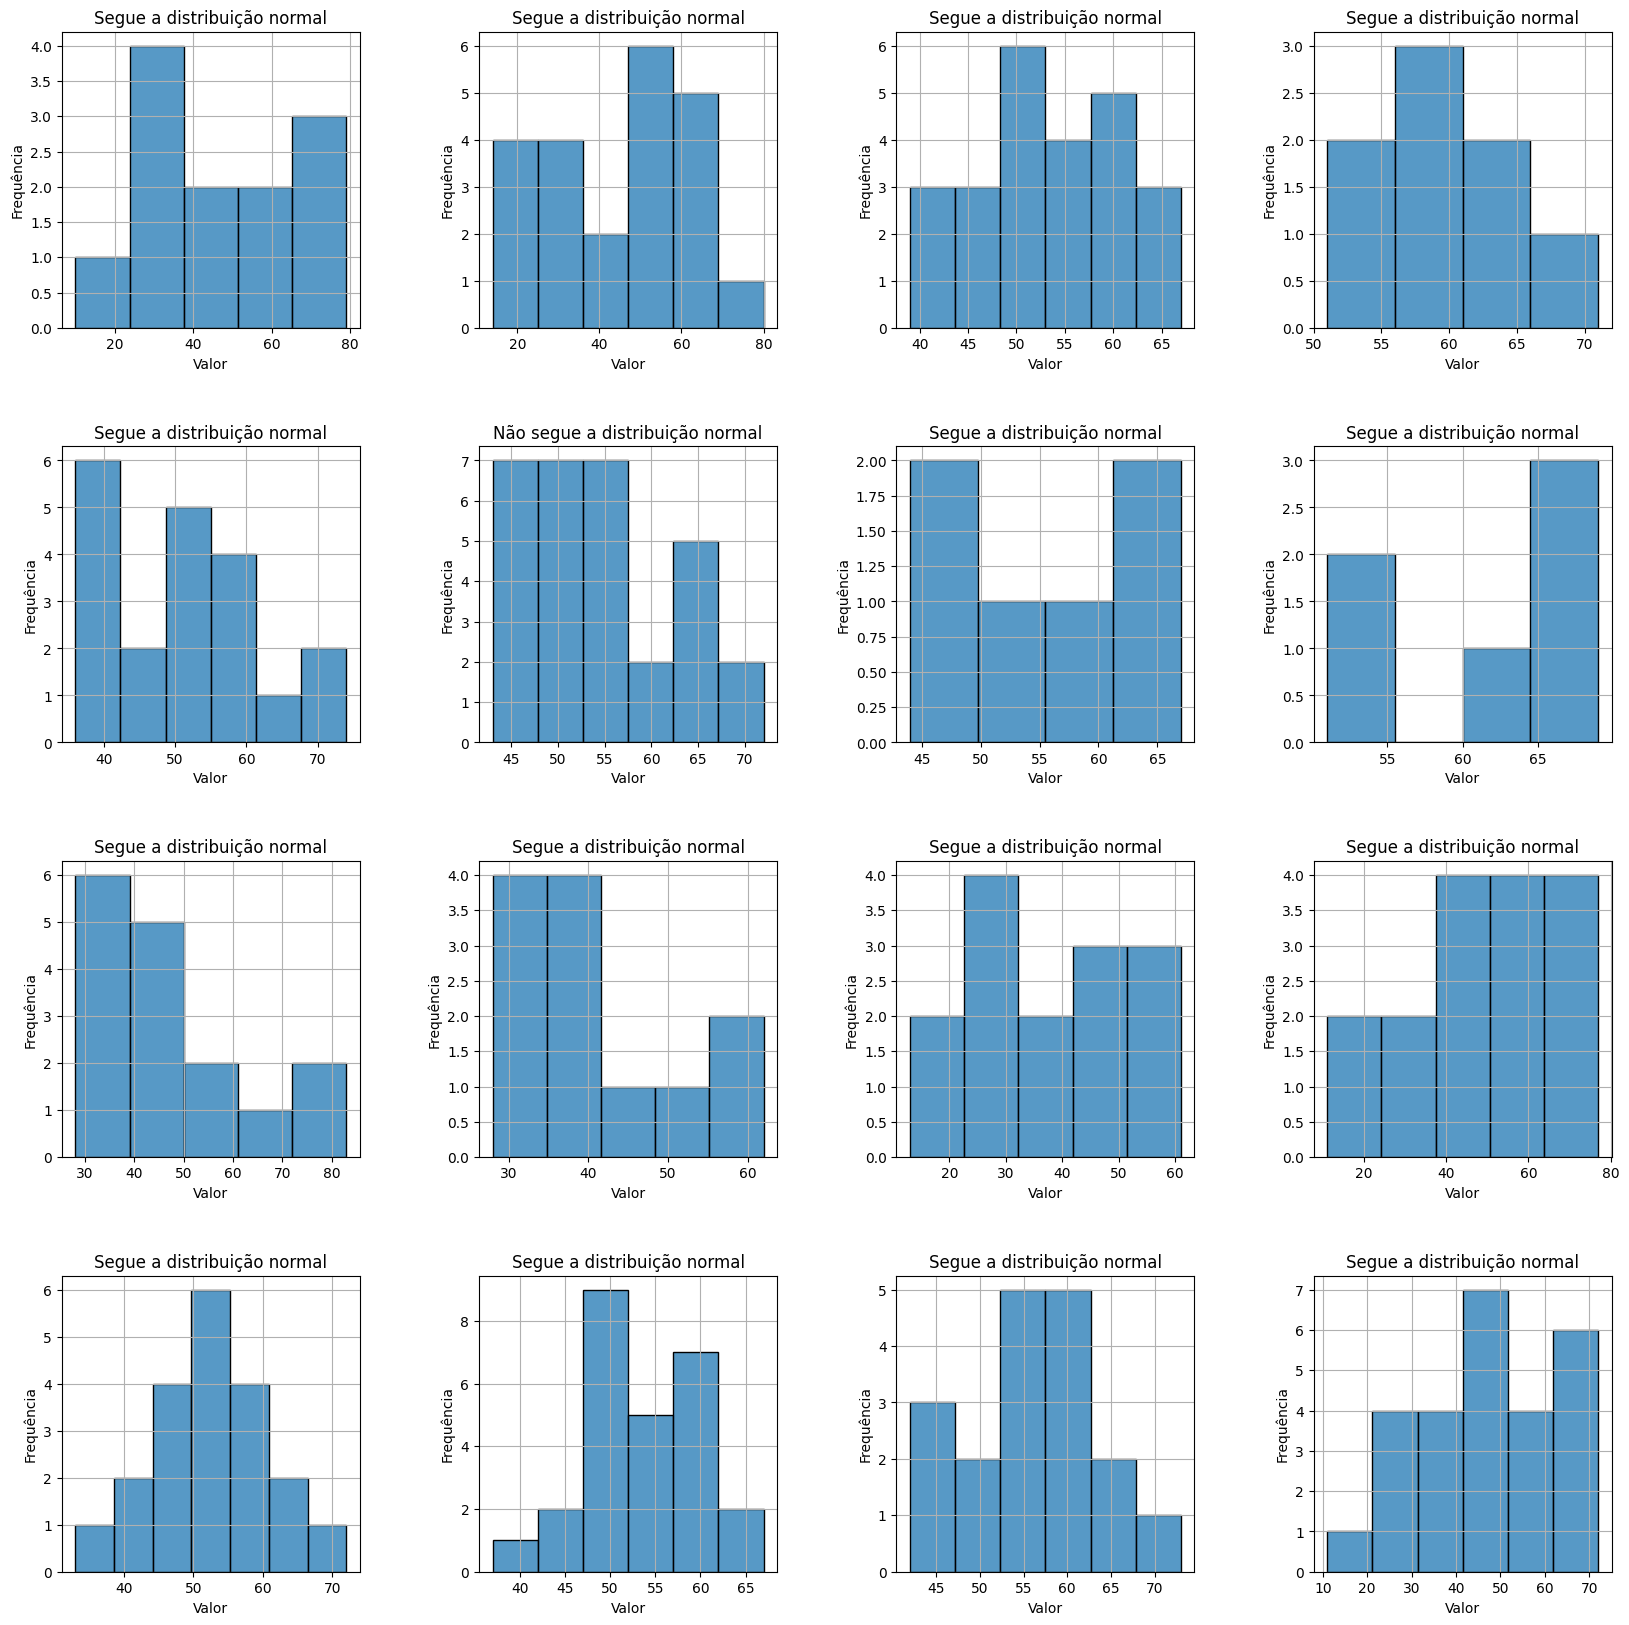

In [94]:

rdf = pd.DataFrame()
is_accepted = []
is_accepted_test = []

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

fns = [generate_sample, generate_normal_random_values]

for h in range(4):
    is_accepted_child = []
    is_accepted_test_child = []
    for j in range(4):
      n = g_par()

      valores = random.choice(fns)(n, 10, 100)

      #valores = generate_normal_random_values(30, 10, 100)
      valores = treat_values(valores)

      valores.sort()

      media, var, dp, cont = statistics(valores)

      tabela = pd.DataFrame(columns=colunas)

      #n = 30

      i = []
      n_i_1 = []

      for c in range(1, n+1):
        if c < (n+1)/2:
          i.append(c)
        else:
          n_i_1.append(c)

      n_i_1.sort(reverse=True)

      tabela['i'] = i

      tabela['n-i+1'] = n_i_1

      Xi = []
      Xn_i_1 = []

      for i, v in enumerate(valores):
        if i < (n)/2:
          Xi.append(v)
        else:
          Xn_i_1.append(v)

      Xn_i_1.sort(reverse=True)

      tabela['Xi'] = Xi

      tabela['Xn-i+1'] = Xn_i_1

      ain = []
      m = (n/2) + 1

      for i in range(1, int(m)):
        ain.append(a[i][n-2])

      tabela['ain'] = ain

      tabela['ain * Xn-i+1 - Xi'] = tabela['ain'] * (tabela['Xn-i+1'] - tabela['Xi'])

      b = sum(tabela['ain * Xn-i+1 - Xi'])

      Wcalc = b**2 / ((n) * var)

      Wcritico = shapiro_wilk_critico(cont)

      if Wcalc > Wcritico:
        is_accepted_child.append(True)
      else:
        is_accepted_child.append(False)

      #testando com a biblioteca padrão
      stat, p = shapiro(valores)
      alpha = 0.05

      if p < alpha:
          is_accepted_test_child.append(False)
      else:
          is_accepted_test_child.append(True)

      #sns.histplot(valores)

      if(is_accepted_child[j]):
          axs[h][j].set_title('Segue a distribuição normal')
      else:
          axs[h][j].set_title('Não segue a distribuição normal')
          
      axs[h][j].set_xlabel('Valor')
      axs[h][j].set_ylabel('Frequência')
      axs[h][j].grid(True)
      sns.histplot(valores, ax=axs[h][j])

      linha = {}
      linha['Amostra'] = f'{h+1}-{j+1}'
      linha['n'] = n
      linha['Média'] = media
      linha['Variância'] = var
      linha['Desvio Padrão'] = dp
      linha['Wcritico'] = Wcritico
      linha['Wcalc'] = Wcalc
      linha['Wcalc_bib'] = stat
      linha['pvalue'] = p
      linha['alpha'] = alpha
      linha['Resultado'] = is_accepted_child[j]
      linha['Resultado_bib'] = is_accepted_test_child[j]
      linha['Resultado_final'] = is_accepted_child[j] == is_accepted_test_child[j]

      rdf = pd.concat([rdf, pd.DataFrame([linha])])

    is_accepted.append(is_accepted_child)
    is_accepted_test.append(is_accepted_test_child)


plt.show()

In [95]:
rdf.reset_index(drop=True, inplace=True)
rdf

,Amostra,n,Média,Variância,Desvio Padrão,Wcritico,Wcalc,Wcalc_bib,pvalue,alpha,Resultado,Resultado_bib,Resultado_final
0,1-1,12,48.416667,359.743056,18.966894,0.859,0.962774,0.962932,0.824721,0.05,True,True,True
1,1-2,22,45.090909,301.173554,17.354353,0.911,0.958750,0.957751,0.445197,0.05,True,True,True
2,1-3,24,53.083333,60.409722,7.772369,0.916,0.959291,0.959996,0.438351,0.05,True,True,True
3,1-4,8,59.750000,31.937500,5.651327,0.818,0.965338,0.965334,0.859092,0.05,True,True,True
4,2-1,20,51.600000,117.040000,10.818503,0.905,0.957458,0.957554,0.496209,0.05,True,True,True
5,2-2,30,55.100000,69.090000,8.312039,0.927,0.925766,0.930204,0.049720,0.05,False,False,True
6,2-3,6,55.500000,75.583333,8.693868,0.788,0.913080,0.913594,0.460457,0.05,True,True,True
7,2-4,6,60.833333,54.805556,7.403077,0.788,0.847713,0.847978,0.151575,0.05,True,True,True
8,3-1,16,48.125000,237.984375,15.426742,0.887,0.920624,0.920677,0.172970,0.05,True,True,True
9,3-2,12,40.000000,115.833333,10.762590,0.859,0.908944,0.908987,0.207062,0.05,True,True,True


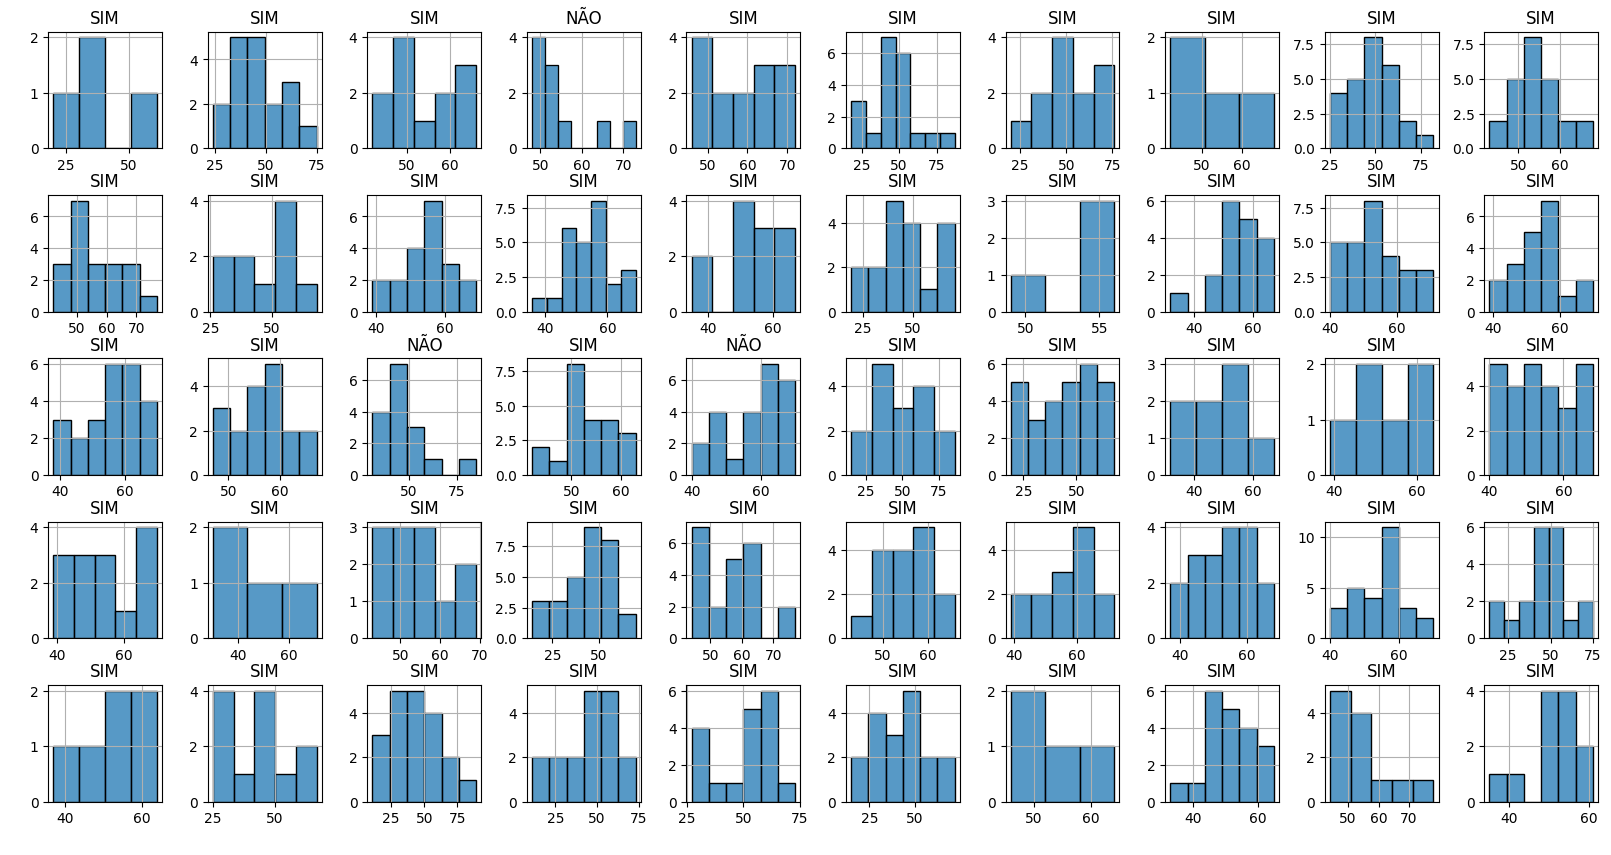

In [96]:
rdf = pd.DataFrame()
is_accepted = []
is_accepted_test = []

fig, axs = plt.subplots(nrows=5, ncols=10, figsize=(20, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

fns = [generate_sample, generate_normal_random_values]

for h in range(5):
    is_accepted_child = []
    is_accepted_test_child = []
    for j in range(10):
      n = g_par()

      valores = random.choice(fns)(n, 10, 100)

      #valores = generate_normal_random_values(30, 10, 100)
      valores = treat_values(valores)

      valores.sort()

      media, var, dp, cont = statistics(valores)

      tabela = pd.DataFrame(columns=colunas)

      #n = 30

      i = []
      n_i_1 = []

      for c in range(1, n+1):
        if c < (n+1)/2:
          i.append(c)
        else:
          n_i_1.append(c)

      n_i_1.sort(reverse=True)

      tabela['i'] = i

      tabela['n-i+1'] = n_i_1

      Xi = []
      Xn_i_1 = []

      for i, v in enumerate(valores):
        if i < (n)/2:
          Xi.append(v)
        else:
          Xn_i_1.append(v)

      Xn_i_1.sort(reverse=True)

      tabela['Xi'] = Xi

      tabela['Xn-i+1'] = Xn_i_1

      ain = []
      m = (n/2) + 1

      for i in range(1, int(m)):
        ain.append(a[i][n-2])

      tabela['ain'] = ain

      tabela['ain * Xn-i+1 - Xi'] = tabela['ain'] * (tabela['Xn-i+1'] - tabela['Xi'])

      b = sum(tabela['ain * Xn-i+1 - Xi'])

      Wcalc = b**2 / ((n) * var)

      Wcritico = shapiro_wilk_critico(cont)

      if Wcalc > Wcritico:
        is_accepted_child.append(True)
      else:
        is_accepted_child.append(False)

      #testando com a biblioteca padrão
      stat, p = shapiro(valores)
      alpha = 0.05

      if p < alpha:
          is_accepted_test_child.append(False)
      else:
          is_accepted_test_child.append(True)

      #sns.histplot(valores)

      if(is_accepted_child[j]):
          axs[h][j].set_title('SIM')
      else:
          axs[h][j].set_title('NÃO')
      axs[h][j].set_xlabel('⠀')
      axs[h][j].set_ylabel('⠀')
      axs[h][j].grid(True)
      sns.histplot(valores, ax=axs[h][j])


      linha = {}
      linha['Amostra'] = f'{h+1}-{j+1}'
      linha['n'] = n
      linha['Média'] = media
      linha['Variância'] = var
      linha['Desvio Padrão'] = dp
      linha['Wcritico'] = Wcritico
      linha['Wcalc'] = Wcalc
      linha['Wcalc_bib'] = stat
      linha['pvalue'] = p
      linha['alpha'] = alpha
      linha['Resultado'] = is_accepted_child[j]
      linha['Resultado_bib'] = is_accepted_test_child[j]
      linha['Resultado_final'] = is_accepted_child[j] == is_accepted_test_child[j]

      rdf = pd.concat([rdf, pd.DataFrame([linha])])

    is_accepted.append(is_accepted_child)
    is_accepted_test.append(is_accepted_test_child)


plt.show()

In [97]:
rdf

,Amostra,n,Média,Variância,Desvio Padrão,Wcritico,Wcalc,Wcalc_bib,pvalue,alpha,Resultado,Resultado_bib,Resultado_final
0,1-1,4,37.250000,220.687500,14.855555,0.748,0.899283,0.899451,0.428338,0.05,True,True,True
0,1-2,18,45.722222,179.978395,13.415603,0.897,0.965658,0.965562,0.711326,0.05,True,True,True
0,1-3,12,54.333333,51.222222,7.156970,0.859,0.963816,0.963957,0.838463,0.05,True,True,True
0,1-4,10,55.000000,53.600000,7.321202,0.842,0.787686,0.787362,0.010177,0.05,False,False,True
0,1-5,14,57.785714,68.882653,8.299557,0.874,0.940739,0.940699,0.427353,0.05,True,True,True
0,1-6,20,46.600000,256.540000,16.016866,0.905,0.961976,0.961954,0.583593,0.05,True,True,True
0,1-7,12,50.833333,236.972222,15.393902,0.859,0.983739,0.983815,0.994586,0.05,True,True,True
0,1-8,4,53.500000,111.250000,10.547512,0.748,0.918306,0.916724,0.518742,0.05,True,True,True
0,1-9,26,47.807692,176.616864,13.289728,0.920,0.976126,0.976646,0.796002,0.05,True,True,True
0,1-10,24,54.375000,32.734375,5.721396,0.916,0.972597,0.973139,0.744396,0.05,True,True,True


In [102]:
rdf = pd.DataFrame()
is_accepted = []
is_accepted_test = []

fns = [generate_sample, generate_normal_random_values]

for h in range(10):
    is_accepted_child = []
    is_accepted_test_child = []
    for j in range(1000):
      n = g_par()

      valores = random.choice(fns)(n, 10, 100)

      #valores = generate_normal_random_values(30, 10, 100)
      valores = treat_values(valores)

      valores.sort()

      media, var, dp, cont = statistics(valores)

      tabela = pd.DataFrame(columns=colunas)

      #n = 30

      i = []
      n_i_1 = []

      for c in range(1, n+1):
        if c < (n+1)/2:
          i.append(c)
        else:
          n_i_1.append(c)

      n_i_1.sort(reverse=True)

      tabela['i'] = i

      tabela['n-i+1'] = n_i_1

      Xi = []
      Xn_i_1 = []

      for i, v in enumerate(valores):
        if i < (n)/2:
          Xi.append(v)
        else:
          Xn_i_1.append(v)

      Xn_i_1.sort(reverse=True)

      tabela['Xi'] = Xi

      tabela['Xn-i+1'] = Xn_i_1

      ain = []
      m = (n/2) + 1

      for i in range(1, int(m)):
        ain.append(a[i][n-2])

      tabela['ain'] = ain

      tabela['ain * Xn-i+1 - Xi'] = tabela['ain'] * (tabela['Xn-i+1'] - tabela['Xi'])

      b = sum(tabela['ain * Xn-i+1 - Xi'])

      Wcalc = b**2 / ((n) * var)

      Wcritico = shapiro_wilk_critico(cont)

      if Wcalc > Wcritico:
        is_accepted_child.append(True)
      else:
        is_accepted_child.append(False)

      #testando com a biblioteca padrão
      stat, p = shapiro(valores)
      alpha = 0.05

      if p < alpha:
          is_accepted_test_child.append(False)
      else:
          is_accepted_test_child.append(True)

      #sns.histplot(valores)

      linha = {}
      linha['Amostra'] = f'{h+1}-{j+1}'
      linha['n'] = n
      linha['Média'] = media
      linha['Variância'] = var
      linha['Desvio Padrão'] = dp
      linha['Wcritico'] = Wcritico
      linha['Wcalc'] = Wcalc
      linha['Wcalc_bib'] = stat
      linha['pvalue'] = p
      linha['alpha'] = alpha
      linha['Resultado'] = is_accepted_child[j]
      linha['Resultado_bib'] = is_accepted_test_child[j]
      linha['Resultado_final'] = is_accepted_child[j] == is_accepted_test_child[j]

      rdf = pd.concat([rdf, pd.DataFrame([linha])])

    is_accepted.append(is_accepted_child)
    is_accepted_test.append(is_accepted_test_child)

In [115]:
rdf.reset_index(drop=True, inplace=True)
print('Quantidade de amostras que não seguem a distribuição normal: {} de {} ({}%)'.format(len(rdf[rdf['Resultado_final'] == False]), len(rdf), len(rdf[rdf['Resultado_final'] == False]) / len(rdf) * 100))
rdf[rdf['Resultado_final'] == False]

Quantidade de amostras que não seguem a distribuição normal: 36 de 10000 (0.36%)


,Amostra,n,Média,Variância,Desvio Padrão,Wcritico,Wcalc,Wcalc_bib,pvalue,alpha,Resultado,Resultado_bib,Resultado_final
20,1-21,20,42.250000,172.387500,13.129642,0.905,0.904670,0.904629,0.050402,0.05,False,True,False
204,1-205,30,54.566667,62.312222,7.893809,0.927,0.929511,0.929489,0.047594,0.05,True,False,False
888,1-889,8,42.750000,316.937500,17.802739,0.818,0.821531,0.821602,0.048508,0.05,True,False,False
1629,2-630,28,52.321429,68.860969,8.298251,0.924,0.924475,0.924094,0.043835,0.05,True,False,False
1672,2-673,30,51.600000,322.706667,17.964038,0.927,0.924716,0.930366,0.050215,0.05,False,True,False
1730,2-731,10,55.000000,76.600000,8.752143,0.842,0.842643,0.842403,0.047147,0.05,True,False,False
2109,3-110,12,48.333333,431.388889,20.769903,0.859,0.859438,0.859438,0.048101,0.05,True,False,False
2397,3-398,20,59.050000,85.947500,9.270787,0.905,0.904586,0.904555,0.050241,0.05,False,True,False
2696,3-697,14,40.928571,334.637755,18.293107,0.874,0.875460,0.875394,0.049990,0.05,True,False,False
2784,3-785,24,57.208333,61.331597,7.831449,0.916,0.916215,0.916790,0.049626,0.05,True,False,False
